In [121]:
import numpy as np
from IPython.display import Image
import branca.colormap as cm
import pandas as pd
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score,recall_score, precision_score
from sklearn.metrics import average_precision_score, roc_auc_score, roc_curve, auc
from xgboost import XGBClassifier
import matplotlib
import imblearn
import folium
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import os
pd.set_option('display.max_columns', 33)

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Top Projects Dataset/Telco_customer_churn.xlsx')

In [ ]:
df.shape

In [124]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [125]:
# df.info()

In [126]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors = 'coerce')

In [127]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [128]:
df.groupby('Churn Label')['CustomerID'].nunique()

Churn Label
No     5174
Yes    1869
Name: CustomerID, dtype: int64

In [129]:
df.dropna(subset = ['Total Charges'], inplace = True)
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5163
dtype: int64

# Churn Understanding

In [130]:
grouped_data = df.groupby('Churn Label')['CustomerID'].nunique().reset_index()

In [131]:
grouped_data

,Churn Label,CustomerID
0,No,5163
1,Yes,1869


In [132]:
fig = px.pie(grouped_data,
             values='CustomerID',
             names='Churn Label',
             color_discrete_sequence=px.colors.qualitative.Set3,
             hole=0.4,
             title='Churn Distribution')
fig.update_traces(marker=dict(line=dict(color='white', width=2)))
fig.show()


We can see that more than 25% of customers have left the company

### Customers' History with the company

In [133]:
fig = px.histogram(df,
                   x="Tenure Months",
                   color="Churn Label",
                   marginal="box",
                   nbins=20,
                   color_discrete_sequence=px.colors.qualitative.Set3,
                   title='Tenure Months Distribution')
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_traces(marker=dict(line=dict(color='black', width=1)))
fig.show()

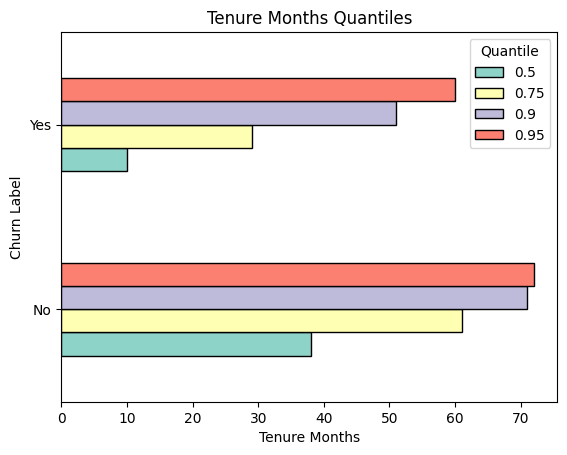

In [134]:
quantiles = df.groupby('Churn Label')['Tenure Months'].quantile([0.50, 0.75, 0.90, 0.95])

ax = quantiles.unstack().plot(kind='barh', color=['#8dd3c7', '#ffffb3', '#bebada', '#fb8072'], edgecolor='black')

plt.xlabel('Tenure Months')
plt.ylabel('Churn Label')
plt.title('Tenure Months Quantiles')
plt.legend(title='Quantile', loc='upper right')

plt.show()


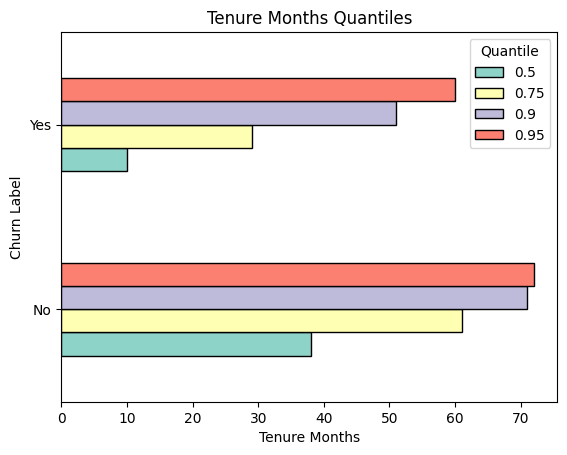

In [135]:
quantiles = df.groupby('Churn Label')['Tenure Months'].quantile([0.50, 0.75, 0.90, 0.95])

ax = quantiles.unstack().plot(kind='barh', color=['#8dd3c7', '#ffffb3', '#bebada', '#fb8072'], edgecolor='black')

plt.xlabel('Tenure Months')
plt.ylabel('Churn Label')
plt.title('Tenure Months Quantiles')
plt.legend(title='Quantile', loc='upper right')

plt.show()


In [136]:
mean_tenure = df.groupby('Churn Label')['Tenure Months'].mean()

In [137]:
mean_tenure

Churn Label
No     37.650010
Yes    17.979133
Name: Tenure Months, dtype: float64

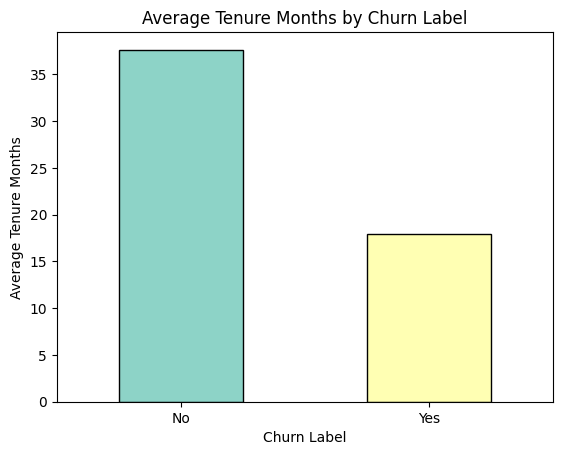

In [138]:
ax = mean_tenure.plot(kind='bar', color=['#8dd3c7', '#ffffb3', '#bebada', '#fb8072'], edgecolor='black')

plt.xlabel('Churn Label')
plt.ylabel('Average Tenure Months')
plt.title('Average Tenure Months by Churn Label')
plt.xticks(rotation=0)

plt.show()

The mean tenure for customer churning is about 17 months, within this timeframe, we have a critical period and most customers don't leave after this period

In [139]:
df.groupby(['Churn Reason'])['CustomerID'].count().reset_index().sort_values('CustomerID', ascending=False)

,Churn Reason,CustomerID
1,Attitude of support person,192
4,Competitor offered higher download speeds,189
5,Competitor offered more data,162
7,Don't know,154
3,Competitor made better offer,140
0,Attitude of service provider,135
2,Competitor had better devices,130
14,Network reliability,103
18,Product dissatisfaction,102
17,Price too high,98


In [140]:
fig_detailed = px.bar(
    df.groupby(['Churn Reason'])['CustomerID'].count().reset_index().sort_values('CustomerID', ascending=False),
    x='Churn Reason',
    y='CustomerID',
    color='Churn Reason',
    text='CustomerID',
    color_discrete_sequence=px.colors.qualitative.Set3,
    labels={'Churn Reason': 'Reason for Churn', 'CustomerID': 'Number of Customers'},
    title='Churn Reasons by Customer Count',
)

fig_detailed.update_traces(texttemplate='%{text}', textposition='outside')

fig_detailed.update_layout(
    xaxis_title='Reason for Churn',
    yaxis_title='Number of Customers',
    font=dict(size=12),
    showlegend=False,
)

fig_detailed.show()


In [141]:
# removing factors we can not control
values_to_remove = ['Deceased', "Don't Know", 'Moved']
data = df.loc[~df['Churn Reason'].isin(values_to_remove)]

In [142]:
data.shape

(6973, 33)

In [143]:
fig = px.histogram(data, x="Churn Label", color="Contract", barmode="group",
                   color_discrete_sequence=px.colors.qualitative.Safe,
                   title="Number of customers by contract type")
fig.update_layout(width=700, height=500, bargap=0.5)
fig.show()


In [144]:
fig = px.pie(data.groupby(['Contract','Churn Label'])['CustomerID'].count().reset_index(),
            values='CustomerID',
            names='Contract',
            facet_col = 'Churn Label',
            color_discrete_sequence=px.colors.qualitative.Set2,
            title = 'Churn rate by contract type')

fig.show()

More than **88%** of churn are happening in the month to month subscription based customers.

In [145]:
grouped_data = data.groupby(['Contract', 'Churn Label'])['Tenure Months'].mean().reset_index()
fig = px.line(grouped_data, x='Contract', y='Tenure Months', color='Churn Label',
              title='Mean Tenure Months by Contract and Churn Label',
              color_discrete_sequence=px.colors.qualitative.Set1)

fig.show()

Customers who currently use the service and have month-to-month contracts tend to stay with the service for a shorter average time. It’s possible that these customers either prefer this type of contract or choose longer contracts after some time with the service.

### Services Used by Customers

We see that customers are using these services:
* *Phone Service*
* *Internet Service*
* *Online Security*
* *Online Backup*
* *Device Protection*
* *Multiple Lines*
* *Tech Support*
* *Streaming TV*
* *Streaming Movies*

In [146]:
data_corr = data
data_corr.shape

(6973, 33)

In [147]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5163
dtype: int64

In [148]:
fig = px.bar(data.groupby('Internet Service')['CustomerID'].count().reset_index(),
             x='Internet Service',
             y='CustomerID',
             color = 'Internet Service',
             text = 'CustomerID')
fig.show()

Highest number of customers are using fiber optic internet which has a positive relation with our churn data. Let's look more into what customers were using who left the service.

In [149]:
data['Churn Label'].value_counts()

Churn Label
No     5163
Yes    1810
Name: count, dtype: int64

In [150]:
data.groupby(['Internet Service','Churn Label'])['CustomerID'].count().reset_index()

,Internet Service,Churn Label,CustomerID
0,DSL,No,1957
1,DSL,Yes,447
2,Fiber optic,No,1799
3,Fiber optic,Yes,1253
4,No,No,1407
5,No,Yes,110


In [151]:
fig = px.pie(data.groupby(['Internet Service','Churn Label'])['CustomerID'].count().reset_index(),
             values='CustomerID',
             facet_col = 'Churn Label',
             names='Internet Service',
             color_discrete_sequence=px.colors.qualitative.Set1,
             title = 'What type of internet was connected to the clients who left the service?')
fig.show()

Around 70% of customers who left us, were using fiber optic internet.

<img src="https://www.homeowner.com/wp-content/uploads/2024/06/Cable-vs-Fiber-internet.jpeg" alt="Image" width="400" height="300">


It seems the fiber connection is better than cable connection, still people using this connection is leaving.

In [153]:
data.groupby(['Internet Service', 'Tech Support', 'Churn Label'])['CustomerID'].count().reset_index()

,Internet Service,Tech Support,Churn Label,CustomerID
0,DSL,No,No,897
1,DSL,No,Yes,338
2,DSL,Yes,No,1060
3,DSL,Yes,Yes,109
4,Fiber optic,No,No,1129
5,Fiber optic,No,Yes,1065
6,Fiber optic,Yes,No,670
7,Fiber optic,Yes,Yes,188
8,No,No internet service,No,1407
9,No,No internet service,Yes,110


In [152]:
# Your existing code
fig = px.bar(data.groupby(['Internet Service', 'Tech Support', 'Churn Label'])['CustomerID'].count().reset_index(),
             x="Internet Service",
             y="CustomerID",
             color="Tech Support",
             text='CustomerID',
             barmode="group",
             color_continuous_scale="Viridis"
            )
fig.show()

Among customers using fiber optics Internet, those who have access to connected tech support exhibit a lower churn rate. In other words, having tech support available seems to positively impact customer retention.

In [154]:
fig = px.pie(data.groupby(['Tech Support','Churn Label'])['CustomerID'].count().reset_index(),
             values='CustomerID',
             facet_col = 'Churn Label',
             hole = .5,
             names='Tech Support',
             title = 'A big pie chart')
fig.show()

It appears that 77.5% of the customers who discontinued the service did not have the tech support option enabled.

In [155]:
fig = px.bar(data.groupby(['Internet Service','Online Security',
                                                'Churn Label'])['CustomerID'].count().reset_index(),
             x="Internet Service",
             y="CustomerID",
             color="Churn Label",
             #barmode="group",
             text = 'CustomerID',
             facet_col = 'Online Security',
             color_continuous_scale="Bluered"
            )
fig.show()

Payment Method and Churn

In [156]:
fig = px.bar(data.groupby(['Payment Method',
                                                'Churn Label'])['CustomerID'].count().reset_index(),
             x="CustomerID",
             y="Payment Method",
             color="Churn Label",
             text = 'CustomerID',
             color_continuous_scale="Bluered"
            )
fig.show()

In [157]:
fig = px.pie(data.groupby(['Payment Method','Churn Label'])['CustomerID'].count().reset_index(),
            values='CustomerID',
            names='Churn Label',
            facet_col = 'Payment Method',
            color = 'Churn Label',
            title = 'Churn rate by customer payment method')

fig.show()

It is interesting to see the churn is lower in automatic payment whereas in electronic and mail checks it is way higher.

In [158]:
grouped_data = data.groupby(['Internet Service', 'Payment Method']).size().reset_index(name='Customer Count')
total_counts = grouped_data.groupby('Internet Service')['Customer Count'].transform('sum')
grouped_data['Percentage'] = grouped_data['Customer Count'] / total_counts * 100
fig = px.bar(grouped_data,
             x='Internet Service',
             y='Percentage',
             color='Payment Method',
             text='Percentage',
             title='Distribution of Payment Methods by Internet Service (Percentage)',
             labels={'Percentage': 'Percentage of Customers (%)', 'Internet Service': 'Internet Service'})
fig.update_traces(texttemplate='%{text:.2f}%', textposition='inside')
fig.update_layout(yaxis_title='Percentage of Customers (%)', xaxis_title='Internet Service', barmode='stack')

fig.show()


For fiber optic internet, the churn rates are elevated across all payment methods, with electronic and mailed checks showing the highest rates. Similarly, for DSL internet, there is a noticeable rise in churn rates associated with these payment methods.

## Age and Gender Contribution

In [159]:
gender_data = data.groupby('Gender')['CustomerID'].count().reset_index()
total_customers = gender_data['CustomerID'].sum()
gender_data['Percentage'] = (gender_data['CustomerID'] / total_customers) * 100
fig = px.bar(gender_data,
             x='Gender',
             y='Percentage',
             color='Gender',
             color_discrete_sequence=px.colors.sequential.Viridis,
             text=gender_data['Percentage'].apply(lambda x: f'{x:.2f}%'),
             title='Distribution of Clients by Gender (%)',
             labels={'Percentage': 'Percentage of Clients', 'Gender': 'Gender'})
fig.update_traces(textposition='outside')
fig.update_layout(yaxis_title='Percentage of Clients', xaxis_title='Gender')

fig.show()


In [160]:
grouped_data = data.groupby(['Gender', 'Churn Label'])['CustomerID'].count().reset_index()

fig = px.bar(grouped_data,
             x="CustomerID",
             y="Gender",
             color="Churn Label",
             text='CustomerID',
             )
fig.show()


No connection between the Gender and Churn.

Does Age hold relevance to this?

In [161]:
fig = px.pie(data.groupby(['Senior Citizen','Churn Label'])['CustomerID'].count().reset_index(),
            values='CustomerID',
            names='Churn Label',
            facet_col = 'Senior Citizen',
            color = 'Churn Label',
            title = 'Churn rate by customer age')

fig.show()

Senior citizens exhibit nearly double the churn rate compared to non-senior citizens, despite comprising a smaller portion of the customer base.

In [162]:
grouped_data = data.groupby('Senior Citizen')['CustomerID'].count().reset_index()
grouped_data.columns = ['Senior Citizen', 'Count']
fig = px.bar(grouped_data,
             x='Senior Citizen',
             y='Count',
             text='Count',
             labels={'Senior Citizen': 'Senior Citizen Status', 'Count': 'Number of Customers'},
             title='Number of Customers by Senior Citizen Status'
            )
fig.show()


In [163]:
fig = px.bar(data.groupby(['Senior Citizen','Partner',
                                        'Dependents','Churn Label'])['CustomerID'].count().reset_index(),
             x="Senior Citizen",
             y="CustomerID",
             color="Churn Label",
             facet_row="Partner",
             facet_col = 'Dependents'
            )
fig.show()


Among senior citizens who do not have partners or dependents, the churn rate approaches 50%. Next, we will explore the specific services utilized by these senior citizens before summarizing and proceeding with the construction of a churn prediction model.

In [164]:
fig = px.bar(data.groupby(['Senior Citizen','Internet Service','Churn Label'])['CustomerID'].count().reset_index(),
             x="Internet Service",
             y="CustomerID",
             color="Churn Label",
             barmode="group",
             facet_col = 'Senior Citizen'
            )
fig.show()

**Summary**

* Customers without Internet services exhibit the lowest churn rate, albeit they constitute a smaller proportion of the customer base.
* A significant 69.2% of churned clients were subscribed to fiber optic Internet services.
* The absence of connected technical support and online security options shows a notable correlation with customer churn.
* Across different types of Internet services, customers using electronic check as their payment method display the highest churn rate.
* Senior citizens experience a churn rate nearly double that of non-senior citizens, highlighting a distinct demographic vulnerability.


# Modelling

In [165]:
data = data.drop(['Country','State','Count','Zip Code','Churn Reason','City','Churn Score','Churn Value','CLTV','CustomerID','Lat Long',
                  'Latitude','Longitude'], axis = 1)

In [166]:
data['Churn Label'].replace(to_replace='Yes', value=1, inplace=True)
data['Churn Label'].replace(to_replace='No',  value=0, inplace=True)

In [168]:
data.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1
5,Female,No,Yes,No,10,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,1
6,Male,Yes,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,1
7,Male,No,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,1


In [169]:
def encode_data(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [170]:
data = data.apply(lambda x: encode_data(x))
data.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label
0,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
4,1,0,0,1,49,1,2,1,0,2,2,0,2,2,0,1,0,103.70,5036.30,1
5,0,0,1,0,10,1,0,0,0,0,2,2,0,0,0,0,1,55.20,528.35,1
6,1,1,0,0,1,0,1,0,0,0,2,0,0,2,0,1,2,39.65,39.65,1
7,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.15,20.15,1


In [171]:
fig = px.bar(data.corr()['Churn Label'].sort_values(ascending = False),
             color = 'value')
fig.show()

In [172]:
data.groupby('Churn Label')['Churn Label'].count()

Churn Label
0    5163
1    1810
Name: Churn Label, dtype: int64

- Unbalanced data in binary classification can skew model performance and compromise prediction accuracy.
- A classifier biased towards the majority class can achieve high accuracy by ignoring the minority class, rendering it ineffective in practical scenarios.
- Techniques like undersampling the majority class or oversampling the minority class are used to address imbalance.
- Undersampling reduces the size of the majority class, while oversampling increases the size of the minority class.
- These techniques aim to create a more balanced training dataset, enabling classifiers to make more reliable predictions on new, unseen data.m

- **SMOTE (Synthetic Minority Oversampling Technique)** is an algorithmic approach used to tackle class imbalance in binary classification datasets.
- It addresses imbalance by generating synthetic samples for the minority class.
- This technique starts by identifying a minority class sample and locating its nearest neighbors in the feature space using a specified distance metric (often Euclidean distance).
- Synthetic samples are then created by interpolating between the original minority sample and its nearest neighbors.
- Specifically, SMOTE randomly selects one of these neighbors, computes the difference between the neighbor and the original sample, scales this difference by a random value between 0 and 1, and adds the scaled difference to the original sample to produce a new synthetic sample.
- By augmenting the minority class with synthetic examples, SMOTE helps balance the dataset, improving the performance of classifiers trained on imbalanced data.

In [173]:
from sklearn.impute import SimpleImputer
x = data.drop("Churn Label", axis=1).values
y = data['Churn Label'].values

imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)

over = SMOTE(sampling_strategy=1)
x_resampled, y_resampled = over.fit_resample(x_imputed, y)


In [174]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state =2, test_size = 0.2)

In [175]:
def model(method, x_train, y_train, x_test, y_test):
    method.fit(x_train, y_train)

    predictions = method.predict(x_test)
    c_matrix = confusion_matrix(y_test, predictions)

    percentages = (c_matrix / np.sum(c_matrix, axis=1)[:, np.newaxis]).round(2) * 100
    labels = [[f"{c_matrix[i, j]} ({percentages[i, j]:.2f}%)" for j in range(c_matrix.shape[1])] for i in range(c_matrix.shape[0])]
    labels = np.asarray(labels)

    sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Blues')

    print("ROC AUC: ", '{:.2%}'.format(roc_auc_score(y_test, predictions)))
    print("Model accuracy: ", '{:.2%}'.format(accuracy_score(y_test, predictions)))
    print(classification_report(y_test, predictions))



In [176]:
xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

ROC AUC:  72.17%
Model accuracy:  80.93%
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1034
           1       0.66      0.54      0.59       361

    accuracy                           0.81      1395
   macro avg       0.76      0.72      0.73      1395
weighted avg       0.80      0.81      0.80      1395



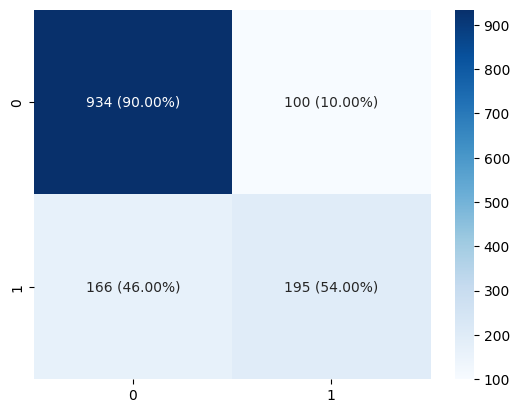

In [177]:
model(xgb,x_train,y_train,x_test,y_test)

In [178]:
xgb = XGBClassifier(
    learning_rate=0.01,
    max_depth=3,
    n_estimators=1000,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27
)

ROC AUC:  72.59%
Model accuracy:  81.15%
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1034
           1       0.66      0.55      0.60       361

    accuracy                           0.81      1395
   macro avg       0.76      0.73      0.74      1395
weighted avg       0.80      0.81      0.81      1395



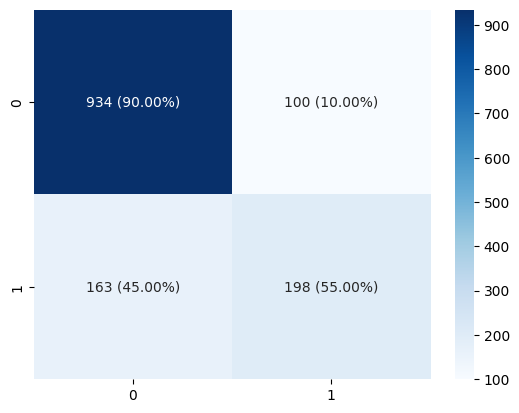

In [179]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from xgboost import XGBClassifier
import seaborn as sns
import numpy as np
def model_evaluation(method, x_train, y_train, x_test, y_test):
    method.fit(x_train, y_train)

    predictions = method.predict(x_test)
    c_matrix = confusion_matrix(y_test, predictions)

    percentages = (c_matrix / np.sum(c_matrix, axis=1)[:, np.newaxis]).round(2) * 100
    labels = [[f"{c_matrix[i, j]} ({percentages[i, j]:.2f}%)" for j in range(c_matrix.shape[1])] for i in range(c_matrix.shape[0])]
    labels = np.asarray(labels)

    sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Blues')

    print("ROC AUC: ", '{:.2%}'.format(roc_auc_score(y_test, predictions)))
    print("Model accuracy: ", '{:.2%}'.format(accuracy_score(y_test, predictions)))
    print(classification_report(y_test, predictions))

xgb = XGBClassifier(
    learning_rate=0.01,
    max_depth=3,
    n_estimators=1000,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27
)

model_evaluation(xgb, x_train, y_train, x_test, y_test)


In [ ]:
import joblib

xgb.fit(x_train, y_train)
joblib.dump(xgb, 'churn_prediction_model.pkl')

In [181]:
import pickle
file = open('/content/XGBclass_model.pkl','wb')
pickle.dump(xgb,file)
file.close()

In [182]:
encoder = LabelEncoder()

In [183]:
file = open('/content/label_encoder.pkl','wb')
pickle.dump(encoder,file)
file.close()